## Arbitrary imputation 

It Consists of replacing NaN by an Arbitrary Value 

The arbitrary value should be different from the mean or median and not within the normal values of the variable.

We can use arbitrary values such as 0,99, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
def impute_NaN(df, variable):
    df[variable +'_Zero'] = df[variable].fillna(0) #Her we can take 0 value or 
    df[variable +'_NightyNine'] = df[variable].fillna(99) # we can take 99
    

In [5]:
impute_NaN(df, 'Age')

In [6]:
df.head()

,Survived,Age,Fare,Age_Zero,Age_NightyNine
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_NightyNine'>

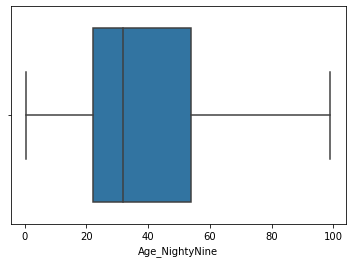

In [7]:
sns.boxplot('Age_NightyNine', data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_Zero'>

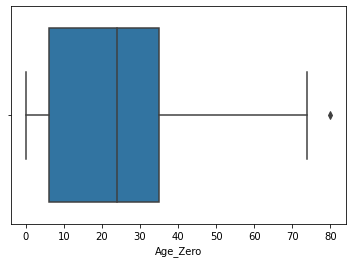

In [8]:
sns.boxplot('Age_Zero', data = df)

## Advantages
>1.Easy to implement

>2.Captures the importance of missingess if there is one

>3.It can be used in production, i.e during model deployment.

## Disadvantages
>1. Distorts the original distribution of the variable

>2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

>3. Hard to decide which value to use